## Basic Liabraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from numpy import array
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Change Directory

In [2]:
os.chdir('C:/Users/Moiz_Ali_Abedin/Desktop/FTI/Capstone Project/Data')

## Making Function to Import all files

In [3]:
def read_data(dataFile):
    ds  = pd.read_csv(dataFile,parse_dates=True,index_col=0)
    return ds


## Reading All Files

### All Dataset are from FEB-2004 to FEB-2020

In [4]:
ATOR =read_data('ATOR Historical Data.csv')
PKOL=read_data("PKOL Historical Data.csv")
PKRF=read_data("PKRF Historical Data.csv")
PSO=read_data("PSO Historical Data.csv")
WTI=read_data('Crude Oil WTI Futures Historical Data.csv')
OGDC=read_data('OGDC Historical Data.csv')
BRENT=read_data('Brent Oil Futures Historical Data.csv')
KSE100=read_data('Karachi 100 Historical Data.csv')
USDPKR=read_data('USD to PKR Data.csv')
GOLD_USD=read_data('Gold Price in PKR.csv')

In [5]:
ATOR.head(20)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-03-11,102.25,104.01,106.20,99.55,2.95M,-1.67%
2020-03-10,103.99,99.51,105.00,98.35,2.08M,5.05%
2020-03-09,98.99,86.61,99.49,86.61,2.55M,5.87%
2020-03-06,93.50,95.51,96.00,92.50,514.10K,-4.48%
2020-03-05,97.89,94.00,99.45,94.00,1.25M,4.81%
2020-03-04,93.40,95.50,95.88,92.02,771.80K,-1.37%
2020-03-03,94.70,97.00,98.10,93.60,1.38M,-1.26%
2020-03-02,95.91,91.00,95.91,90.50,1.24M,6.99%
2020-02-28,89.64,89.70,92.48,89.00,1.20M,-0.51%


In [6]:
ATOR.tail(20)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-03-08,30.63,28.47,30.63,28.47,4.19M,7.47%
2004-03-05,28.50,28.44,28.75,28.31,499.44K,-0.52%
2004-03-04,28.65,28.72,28.91,28.58,650.81K,-0.69%
2004-03-03,28.85,27.92,29.18,27.92,972.93K,0.45%
2004-02-27,28.72,27.90,28.99,27.90,3.73M,6.06%
2004-02-26,27.08,25.76,27.35,25.61,1.21M,4.23%
2004-02-25,25.98,25.78,26.38,25.44,1.23M,0.00%
2004-02-24,25.98,25.18,26.26,25.18,2.35M,-1.93%
2004-02-23,26.49,28.17,28.17,26.49,804.01K,-4.95%


In [7]:
ATOR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3935 entries, 2020-03-11 to 2004-02-06
Data columns (total 6 columns):
Price       3935 non-null float64
Open        3935 non-null float64
High        3935 non-null float64
Low         3935 non-null float64
Vol.        3935 non-null object
Change %    3935 non-null object
dtypes: float64(4), object(2)
memory usage: 215.2+ KB


In [8]:
PKOL.head(6)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-31,424.34,434.93,436.00,423.0,186.80K,-1.11%
2020-01-30,429.11,433.00,434.90,429.0,138.30K,-1.24%
2020-01-29,434.50,437.00,441.00,433.1,56.00K,0.03%
2020-01-28,434.35,441.00,441.00,433.0,121.10K,-0.95%
2020-01-27,438.50,441.65,443.48,435.5,165.30K,-1.82%
2020-01-24,446.62,453.00,454.50,443.0,257.40K,-1.63%


In [9]:
PKRF.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-31,21.65,22.64,22.85,21.26,1.22M,-2.74%
2020-01-30,22.26,22.60,22.60,22.17,689.00K,-1.07%
2020-01-29,22.50,22.30,23.34,22.30,2.08M,0.67%
2020-01-28,22.35,22.30,22.60,22.06,326.00K,0.22%
2020-01-27,22.30,23.00,23.10,22.25,669.50K,-2.19%


In [10]:
PSO.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-31,207.80,211.00,212.15,207.06,1.58M,-0.82%
2020-01-30,209.51,210.98,210.99,208.50,1.09M,-0.47%
2020-01-29,210.50,212.20,213.49,210.01,1.68M,-0.66%
2020-01-28,211.90,211.10,212.98,211.00,739.40K,-0.28%
2020-01-27,212.50,214.50,215.00,211.25,601.10K,-0.43%


In [11]:
WTI.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-02-28,44.76,46.49,47.03,43.85,1.10M,-4.95%
2020-02-27,47.09,48.63,48.78,45.88,1.01M,-3.37%
2020-02-26,48.73,50.08,50.44,48.30,884.48K,-2.34%
2020-02-25,49.90,51.37,52.02,49.69,764.99K,-2.97%
2020-02-24,51.43,52.60,52.64,50.45,765.52K,-3.65%


In [12]:
OGDC.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-31,137.98,139.50,141.20,137.71,1.85M,-1.51%
2020-01-30,140.10,140.15,140.85,139.05,2.11M,-0.29%
2020-01-29,140.51,139.31,142.79,139.31,2.12M,0.22%
2020-01-28,140.20,141.50,141.50,138.75,1.20M,-0.55%
2020-01-27,140.98,142.20,143.90,140.20,1.61M,-1.90%


In [13]:
BRENT.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-30,58.29,59.60,59.65,57.71,104.27K,-2.54%
2020-01-29,59.81,59.86,60.62,59.26,142.68K,0.50%
2020-01-28,59.51,59.03,60.12,58.50,248.95K,0.32%
2020-01-27,59.32,60.23,60.49,58.50,259.77K,-2.26%
2020-01-24,60.69,62.01,62.46,60.25,257.95K,-2.18%


In [14]:
KSE100.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-02-28,"37,983.62","38,087.32","38,307.07","37,758.57",-,-0.27%
2020-02-27,"38,087.32","38,338.33","38,338.33","36,918.22",-,-0.65%
2020-02-26,"38,338.33","38,858.45","38,976.83","38,074.16",-,-1.34%
2020-02-25,"38,858.45","39,143.73","39,247.75","38,693.02",-,-0.73%
2020-02-24,"39,143.73","40,249.22","40,249.22","39,079.78",-,-2.75%


In [15]:
USDPKR.head()

,Price,Open,High,Vol.,Low,Change %
Date,,,,,,
2020-02-29,154.165,154.165,154.165,NaN,154.165,0.00%
2020-02-28,154.165,154.335,155.065,NaN,154.165,0.02%
2020-02-27,154.135,154.615,155.045,NaN,154.085,-0.02%
2020-02-26,154.160,154.640,155.080,NaN,154.160,-0.04%
2020-02-25,154.220,154.220,154.680,NaN,154.220,-0.16%


In [16]:
GOLD_USD.head()

,PKR,US dollar,Open,High,Low
Date,,,,,
2004-02-02,"22,821.50",398.4,NaN,NaN,NaN
2004-02-03,"23,027.20",401.5,NaN,NaN,NaN
2004-02-04,"22,875.00",399.3,NaN,NaN,NaN
2004-02-05,"22,774.40",399.6,NaN,NaN,NaN
2004-02-06,"23,106.90",404.3,NaN,NaN,NaN


## Checking Null Values from All data

In [17]:
ATOR.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [18]:
PKOL.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [19]:
PKRF.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [20]:
PSO.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [21]:
WTI.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [22]:
OGDC.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [23]:
BRENT.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [24]:
KSE100.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [25]:
USDPKR.isnull().sum()

Price          0
Open           0
High           0
Vol.        4732
Low            0
Change %       0
dtype: int64

In [26]:
GOLD_USD.head()

,PKR,US dollar,Open,High,Low
Date,,,,,
2004-02-02,"22,821.50",398.4,NaN,NaN,NaN
2004-02-03,"23,027.20",401.5,NaN,NaN,NaN
2004-02-04,"22,875.00",399.3,NaN,NaN,NaN
2004-02-05,"22,774.40",399.6,NaN,NaN,NaN
2004-02-06,"23,106.90",404.3,NaN,NaN,NaN


In [27]:
ATOR.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [28]:
ATOR.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-03-11,102.25,104.01,106.20,99.55,2.95M,-1.67%
2020-03-10,103.99,99.51,105.00,98.35,2.08M,5.05%
2020-03-09,98.99,86.61,99.49,86.61,2.55M,5.87%
2020-03-06,93.50,95.51,96.00,92.50,514.10K,-4.48%
2020-03-05,97.89,94.00,99.45,94.00,1.25M,4.81%


## Fill Missing value by Resampling 

In [29]:
def AddMissingDays(ds):
    ds = ds.resample('D').bfill().reset_index()
    ds.set_index('Date', inplace=True)
    return ds

In [30]:
ATOR=AddMissingDays(ATOR)
PKOL=AddMissingDays(PKOL)
PKRF=AddMissingDays(PKRF)
PSO=AddMissingDays(PSO)
WTI=AddMissingDays(WTI)
OGDC=AddMissingDays(OGDC)
BRENT=AddMissingDays(BRENT)
KSE100=AddMissingDays(KSE100)
USDPKR=AddMissingDays(USDPKR)
GOLD_USD=AddMissingDays(GOLD_USD)


In [31]:
ATOR.duplicated().sum()

1951

## Checking that All data rely on same range or not

In [32]:
ATOR.shape

(5879, 6)

In [33]:
ATOR.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,22.97,23.78,23.78,22.28,1.41M,1.41%
2004-02-07,21.88,22.89,23.21,21.83,1.04M,-4.75%
2004-02-08,21.88,22.89,23.21,21.83,1.04M,-4.75%
2004-02-09,21.88,22.89,23.21,21.83,1.04M,-4.75%
2004-02-10,23.52,21.62,23.52,21.06,4.74M,7.50%


In [34]:
ATOR.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-03-07,98.99,86.61,99.49,86.61,2.55M,5.87%
2020-03-08,98.99,86.61,99.49,86.61,2.55M,5.87%
2020-03-09,98.99,86.61,99.49,86.61,2.55M,5.87%
2020-03-10,103.99,99.51,105.00,98.35,2.08M,5.05%
2020-03-11,102.25,104.01,106.20,99.55,2.95M,-1.67%


In [35]:
PKRF.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,14.10,14.10,14.10,14.10,10.92K,1.29%
2004-02-07,13.75,13.73,14.10,13.73,74.27K,-2.48%
2004-02-08,13.75,13.73,14.10,13.73,74.27K,-2.48%
2004-02-09,13.75,13.73,14.10,13.73,74.27K,-2.48%
2004-02-10,13.83,14.19,14.19,13.73,159.46K,0.58%


In [36]:
PKRF.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-27,22.30,23.00,23.10,22.25,669.50K,-2.19%
2020-01-28,22.35,22.30,22.60,22.06,326.00K,0.22%
2020-01-29,22.50,22.30,23.34,22.30,2.08M,0.67%
2020-01-30,22.26,22.60,22.60,22.17,689.00K,-1.07%
2020-01-31,21.65,22.64,22.85,21.26,1.22M,-2.74%


In [37]:
PKRF.shape

(5839, 6)

In [38]:
PSO.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,104.67,104.91,105.20,104.43,15.46M,-0.40%
2004-02-07,103.21,104.41,105.18,103.06,14.77M,-1.39%
2004-02-08,103.21,104.41,105.18,103.06,14.77M,-1.39%
2004-02-09,103.21,104.41,105.18,103.06,14.77M,-1.39%
2004-02-10,104.71,103.03,105.00,102.84,31.22M,1.45%


In [39]:
PSO.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-27,212.50,214.50,215.00,211.25,601.10K,-0.43%
2020-01-28,211.90,211.10,212.98,211.00,739.40K,-0.28%
2020-01-29,210.50,212.20,213.49,210.01,1.68M,-0.66%
2020-01-30,209.51,210.98,210.99,208.50,1.09M,-0.47%
2020-01-31,207.80,211.00,212.15,207.06,1.58M,-0.82%


In [40]:
PSO.shape


(5839, 6)

In [41]:
PKOL.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,104.84,104.51,104.95,103.61,5.89M,0.45%
2004-02-07,105.83,106.18,106.81,105.56,32.39M,0.94%
2004-02-08,105.83,106.18,106.81,105.56,32.39M,0.94%
2004-02-09,105.83,106.18,106.81,105.56,32.39M,0.94%
2004-02-10,106.04,105.56,106.48,105.16,10.64M,0.20%


In [42]:
PKOL.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-27,438.50,441.65,443.48,435.5,165.30K,-1.82%
2020-01-28,434.35,441.00,441.00,433.0,121.10K,-0.95%
2020-01-29,434.50,437.00,441.00,433.1,56.00K,0.03%
2020-01-30,429.11,433.00,434.90,429.0,138.30K,-1.24%
2020-01-31,424.34,434.93,436.00,423.0,186.80K,-1.11%


In [43]:
PKOL.shape

(5839, 6)

In [44]:
WTI.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-02,34.98,33.20,35.05,32.56,114.74K,5.84%
2004-02-03,34.10,34.85,35.19,34.07,96.81K,-2.52%
2004-02-04,33.10,34.09,34.45,32.95,103.75K,-2.93%
2004-02-05,33.08,33.19,33.30,32.20,114.24K,-0.06%
2004-02-06,32.48,33.11,33.44,32.32,85.11K,-1.81%


In [45]:
WTI.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-02-24,51.43,52.60,52.64,50.45,765.52K,-3.65%
2020-02-25,49.90,51.37,52.02,49.69,764.99K,-2.97%
2020-02-26,48.73,50.08,50.44,48.30,884.48K,-2.34%
2020-02-27,47.09,48.63,48.78,45.88,1.01M,-3.37%
2020-02-28,44.76,46.49,47.03,43.85,1.10M,-4.95%


In [46]:
WTI.shape

(5871, 6)

In [47]:
BRENT.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-02,30.23,29.00,30.38,28.60,40.98K,3.60%
2004-02-03,29.50,29.91,30.15,29.43,45.60K,-2.41%
2004-02-04,28.88,29.55,29.80,28.85,51.40K,-2.10%
2004-02-05,29.27,29.00,29.37,28.44,44.12K,1.35%
2004-02-06,28.83,29.30,29.61,28.61,29.77K,-1.50%


In [48]:
BRENT.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-26,59.32,60.23,60.49,58.50,259.77K,-2.26%
2020-01-27,59.32,60.23,60.49,58.50,259.77K,-2.26%
2020-01-28,59.51,59.03,60.12,58.50,248.95K,0.32%
2020-01-29,59.81,59.86,60.62,59.26,142.68K,0.50%
2020-01-30,58.29,59.60,59.65,57.71,104.27K,-2.54%


In [49]:
BRENT.shape

(5842, 6)

In [50]:
OGDC.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,53.85,53.65,54.00,53.1,1.50M,0.19%
2004-02-07,53.05,53.35,53.85,52.8,2.69M,-1.49%
2004-02-08,53.05,53.35,53.85,52.8,2.69M,-1.49%
2004-02-09,53.05,53.35,53.85,52.8,2.69M,-1.49%
2004-02-10,53.75,52.30,54.20,51.7,48.59M,1.32%


In [51]:
OGDC.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-27,140.98,142.20,143.90,140.20,1.61M,-1.90%
2020-01-28,140.20,141.50,141.50,138.75,1.20M,-0.55%
2020-01-29,140.51,139.31,142.79,139.31,2.12M,0.22%
2020-01-30,140.10,140.15,140.85,139.05,2.11M,-0.29%
2020-01-31,137.98,139.50,141.20,137.71,1.85M,-1.51%


In [52]:
OGDC.shape

(5839, 6)

In [53]:
KSE100.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,"4,888.45","4,841.64","4,890.72","4,815.14",-,0.97%
2004-02-07,"4,848.31","4,902.16","4,909.89","4,840.35",-,-0.82%
2004-02-08,"4,848.31","4,902.16","4,909.89","4,840.35",-,-0.82%
2004-02-09,"4,848.31","4,902.16","4,909.89","4,840.35",-,-0.82%
2004-02-10,"4,907.93","4,852.27","4,912.68","4,835.33",-,1.23%


In [54]:
KSE100.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-02-24,"39,143.73","40,249.22","40,249.22","39,079.78",-,-2.75%
2020-02-25,"38,858.45","39,143.73","39,247.75","38,693.02",-,-0.73%
2020-02-26,"38,338.33","38,858.45","38,976.83","38,074.16",-,-1.34%
2020-02-27,"38,087.32","38,338.33","38,338.33","36,918.22",-,-0.65%
2020-02-28,"37,983.62","38,087.32","38,307.07","37,758.57",-,-0.27%


In [55]:
KSE100.shape

(5867, 6)

In [56]:
USDPKR.head()

,Price,Open,High,Vol.,Low,Change %
Date,,,,,,
2004-02-02,57.290,57.20,57.410,NaN,57.05,-0.58%
2004-02-03,57.360,57.10,57.540,NaN,56.98,0.12%
2004-02-04,57.295,56.98,57.505,NaN,56.98,-0.11%
2004-02-05,57.000,57.05,57.300,NaN,56.75,-0.51%
2004-02-06,57.160,57.20,57.590,NaN,57.01,0.28%


In [57]:
USDPKR.tail()

,Price,Open,High,Vol.,Low,Change %
Date,,,,,,
2020-02-25,154.220,154.220,154.680,NaN,154.220,-0.16%
2020-02-26,154.160,154.640,155.080,NaN,154.160,-0.04%
2020-02-27,154.135,154.615,155.045,NaN,154.085,-0.02%
2020-02-28,154.165,154.335,155.065,NaN,154.165,0.02%
2020-02-29,154.165,154.165,154.165,NaN,154.165,0.00%


In [58]:
USDPKR.shape

(5872, 6)

In [59]:
GOLD_USD.head()

,PKR,US dollar,Open,High,Low
Date,,,,,
2004-02-02,"22,821.50",398.4,NaN,NaN,NaN
2004-02-03,"23,027.20",401.5,NaN,NaN,NaN
2004-02-04,"22,875.00",399.3,NaN,NaN,NaN
2004-02-05,"22,774.40",399.6,NaN,NaN,NaN
2004-02-06,"23,106.90",404.3,NaN,NaN,NaN


In [60]:
GOLD_USD.tail()

,PKR,US dollar,Open,High,Low
Date,,,,,
2020-02-24,"258,203.10","1,671.70",NaN,NaN,NaN
2020-02-25,"254,509.30","1,650.30",NaN,NaN,NaN
2020-02-26,"252,036.20","1,634.90",NaN,NaN,NaN
2020-02-27,"254,631.00","1,652.00",NaN,NaN,NaN
2020-02-28,"248,182.50","1,609.90",NaN,NaN,NaN


In [61]:
GOLD_USD.shape

(5871, 5)

## Removing % from change% and K from Vol. 

In [62]:
def RemovePer(ds):
    ds['Change %'] = (ds['Change %'].str.strip('%').astype(float))
    return ds

In [63]:
ATOR=RemovePer(ATOR)
PKOL=RemovePer(PKOL)
PKRF=RemovePer(PKRF)
PSO=RemovePer(PSO)
WTI=RemovePer(WTI)
OGDC=RemovePer(OGDC)
BRENT=RemovePer(BRENT)
KSE100=RemovePer(KSE100)
USDPKR=RemovePer(USDPKR)

In [64]:
ATOR.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2004-02-06,22.97,23.78,23.78,22.28,1.41M,1.41
2004-02-07,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-08,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-09,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-10,23.52,21.62,23.52,21.06,4.74M,7.50


In [65]:
ATOR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5879 entries, 2004-02-06 to 2020-03-11
Data columns (total 6 columns):
Price       5879 non-null float64
Open        5879 non-null float64
High        5879 non-null float64
Low         5879 non-null float64
Vol.        5879 non-null object
Change %    5879 non-null float64
dtypes: float64(5), object(1)
memory usage: 321.5+ KB


In [66]:
GOLD_USD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5871 entries, 2004-02-02 to 2020-02-28
Data columns (total 5 columns):
PKR          5871 non-null object
US dollar    5871 non-null object
Open         0 non-null float64
High         0 non-null float64
Low          0 non-null float64
dtypes: float64(3), object(2)
memory usage: 275.2+ KB


In [67]:
GOLD_USD['US dollar'] = pd.to_numeric(GOLD_USD['US dollar'],errors='coerce')

In [68]:
GOLD_USD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5871 entries, 2004-02-02 to 2020-02-28
Data columns (total 5 columns):
PKR          5871 non-null object
US dollar    2055 non-null float64
Open         0 non-null float64
High         0 non-null float64
Low          0 non-null float64
dtypes: float64(4), object(1)
memory usage: 275.2+ KB


In [69]:
GOLD_USD['Change%_GOLD']=GOLD_USD['US dollar'].pct_change().round(2)

In [70]:
GOLD_USD.head()

,PKR,US dollar,Open,High,Low,Change%_GOLD
Date,,,,,,
2004-02-02,"22,821.50",398.4,NaN,NaN,NaN,NaN
2004-02-03,"23,027.20",401.5,NaN,NaN,NaN,0.01
2004-02-04,"22,875.00",399.3,NaN,NaN,NaN,-0.01
2004-02-05,"22,774.40",399.6,NaN,NaN,NaN,0.00
2004-02-06,"23,106.90",404.3,NaN,NaN,NaN,0.01


In [71]:
GOLD_USD.isnull().sum()

PKR                0
US dollar       3816
Open            5871
High            5871
Low             5871
Change%_GOLD       1
dtype: int64

In [72]:
GOLD_USD['Change%_GOLD'].fillna((GOLD_USD['Change%_GOLD'].median()), inplace=True)


## Changing Columns Name with Return

In [73]:
ATOR=ATOR.rename(columns={'Change %':'Change%_ATOR'})
PSO=PSO.rename(columns={'Change %':'Change%_PSO'})
PKOL=PKOL.rename(columns={'Change %':'Change%_PKOL'})
PKRF=PKRF.rename(columns={'Change %':'Change%_PKRF'})
WTI=WTI.rename(columns={'Change %':'Change%_WTI'})
OGDC=OGDC.rename(columns={'Change %':'Change%_OGDC'})
BRENT=BRENT.rename(columns={'Change %':'Change%_BRENT'})
KSE100=KSE100.rename(columns={'Change %':'Change%_KSE100'})
USDPKR=USDPKR.rename(columns={'Change %':'Change%_USDPKR'})

## Dataset Features Description:

    1. Date:          YYYY-MM-DD Format ( All Data Sets)
    2. Index          Type / Name of Index ( KSE, PSO, Abbot, SSGPL Datasets)
    3. Open           Opening price of the stock on a give date(All Stocks Dataets and DOWJONES)
    4. High           The highest price of the stock on a given date ( All Stocks Datasets and DOWJONES)
    5. Low            The lowest price of a stock on a given date ( All Stocks Datasets and DOWJONES)
    6. Close          The closing pric of a stock on a given date ( All Stocks DAtasets and DOWNONES)
    7.Change_PSO        Percentage change in PSO stock price
    8.Change_PKOL       Percentage change in PKOL stock price
    9.Change_PKRF       Percentage change in PKRF stock price
    10.Change_ATOR      Percentage change in ATOR stock price
    12.Change_WTI       Percentage change in WTI stock price
    13.Change_OGDC     Percentage change in OGDC stock price
    14.Change_BRENT    Percentage change in BRENT stock price
    15.Change_KSE100   Percentage change in KSE100 stock price
    16.Change_USDPKR   Percentage change in USDPPKR stock price
    17.Change_GOLD_USD     Percentage change in GOLD_USD stock price
    

In [74]:
ATOR.head()

,Price,Open,High,Low,Vol.,Change%_ATOR
Date,,,,,,
2004-02-06,22.97,23.78,23.78,22.28,1.41M,1.41
2004-02-07,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-08,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-09,21.88,22.89,23.21,21.83,1.04M,-4.75
2004-02-10,23.52,21.62,23.52,21.06,4.74M,7.50


## Attribute Selection
Having calculated the Returns and Percentage Changes , many of the attributes like Open, Low, High, Close can be dropped from the datsets because there effect has been taken ito account. 

     DATASET                       ATTRIBUTES 
       
   1. ATOR                       ( Date, Change_ATOR)
   2. PSO                       ( Date, Change_PSO)
   3. PKOL                     ( Date, Change_PKOL)
   4. PKRF                    ( Date, Change_PKRF)
   5. WTI                      (Date, Change_WTI)
   6. OGDC                      (Date, Change_OGDC)
   7. KSE100                      (Date, Change_KSE100)
   8. BRENT                      (Date, Change_BRENT)
   9. USDPKR                      (Date, Change_USD_PKR)
   10. GOLD_USD                      (Date, Change_GOLD_USD)

## Remove All Useless Columns

In [75]:
def Removecols(ds):
    ds=ds.drop(ds.columns[[0,1,2,3,4]],axis=1)
    return ds

In [76]:
ATOR=Removecols(ATOR)
PKOL=Removecols(PKOL)
PKRF=Removecols(PKRF)
PSO=Removecols(PSO)
WTI=Removecols(WTI)
OGDC=Removecols(OGDC)
BRENT=Removecols(BRENT)
KSE100=Removecols(KSE100)
USDPKR=Removecols(USDPKR)
GOLD_USD=Removecols(GOLD_USD)

## Merged All Datasets

In [77]:
data_frames=[ATOR,PSO,PKRF,PKOL,WTI,OGDC,BRENT,KSE100,USDPKR,GOLD_USD]
ds_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

In [78]:
ds_merged.head()

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD
Date,,,,,,,,,,
2004-02-06,1.41,-0.40,1.29,0.45,-1.81,0.19,-1.50,0.97,0.28,0.01
2004-02-07,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00
2004-02-08,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00
2004-02-09,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00
2004-02-10,7.50,1.45,0.58,0.20,3.17,1.32,3.19,1.23,-0.08,0.01


## Construct features like Year, Month, Week, and Weekday to have some more features.

## Also Label Encoding of WeekDay 

In [79]:
def extractfeatures(ds_merged):
    ds_merged['Year']=ds_merged.index.year
    ds_merged['Month']=ds_merged.index.month
    ds_merged['WeekDay']=ds_merged.index.weekday_name
    labelencoder=LabelEncoder()
    ds_merged.WeekDay=labelencoder.fit_transform(ds_merged.WeekDay)
    return ds_merged

In [80]:
ds_merged=extractfeatures(ds_merged)

In [81]:
ds_merged.head()

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,1.41,-0.40,1.29,0.45,-1.81,0.19,-1.50,0.97,0.28,0.01,2004,2,0
2004-02-07,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,2
2004-02-08,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,3
2004-02-09,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,1
2004-02-10,7.50,1.45,0.58,0.20,3.17,1.32,3.19,1.23,-0.08,0.01,2004,2,5


In [82]:
ds_merged.shape

(5883, 13)

## Checking NULL Values

In [83]:
ds_merged.isnull().sum()

Change%_ATOR       4
Change%_PSO       44
Change%_PKRF      44
Change%_PKOL      44
Change%_WTI       12
Change%_OGDC      44
Change%_BRENT     41
Change%_KSE100    16
Change%_USDPKR    11
Change%_GOLD      12
Year               0
Month              0
WeekDay            0
dtype: int64

## Replacing Null values with Median 

In [84]:
for col in ['Change%_ATOR'             
,'Change%_PSO'             
,'Change%_PKRF'            
,'Change%_PKOL'            
,'Change%_WTI'             
,'Change%_OGDC'
,'Change%_BRENT'           
,'Change%_KSE100'          
,'Change%_USDPKR'
, 'Change%_GOLD']:
    ds_merged[col].fillna(ds_merged[col].median(), inplace=True)

In [85]:
ds_merged.isnull().sum()

Change%_ATOR      0
Change%_PSO       0
Change%_PKRF      0
Change%_PKOL      0
Change%_WTI       0
Change%_OGDC      0
Change%_BRENT     0
Change%_KSE100    0
Change%_USDPKR    0
Change%_GOLD      0
Year              0
Month             0
WeekDay           0
dtype: int64

In [86]:
ds_merged.dtypes

Change%_ATOR      float64
Change%_PSO       float64
Change%_PKRF      float64
Change%_PKOL      float64
Change%_WTI       float64
Change%_OGDC      float64
Change%_BRENT     float64
Change%_KSE100    float64
Change%_USDPKR    float64
Change%_GOLD      float64
Year                int64
Month               int64
WeekDay             int64
dtype: object

## Checking Unique Values

In [87]:

print (ds_merged.apply(lambda x: x.nunique()))

Change%_ATOR      917
Change%_PSO       812
Change%_PKRF      939
Change%_PKOL      797
Change%_WTI       982
Change%_OGDC      802
Change%_BRENT     924
Change%_KSE100    660
Change%_USDPKR    261
Change%_GOLD       15
Year               17
Month              12
WeekDay             7
dtype: int64


In [88]:
ds_merged.head()

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,1.41,-0.40,1.29,0.45,-1.81,0.19,-1.50,0.97,0.28,0.01,2004,2,0
2004-02-07,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,2
2004-02-08,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,3
2004-02-09,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,1
2004-02-10,7.50,1.45,0.58,0.20,3.17,1.32,3.19,1.23,-0.08,0.01,2004,2,5


## Plotting Box-Plots to checking Outliers

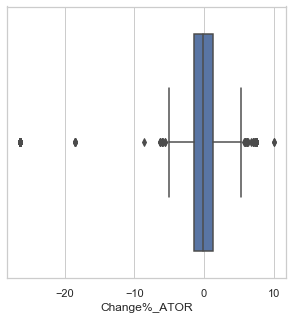

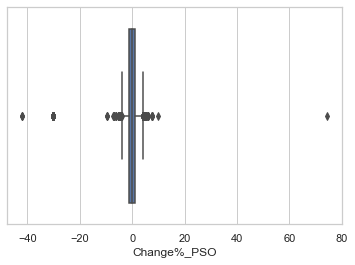

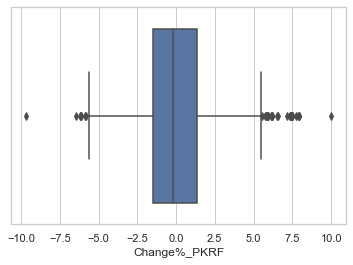

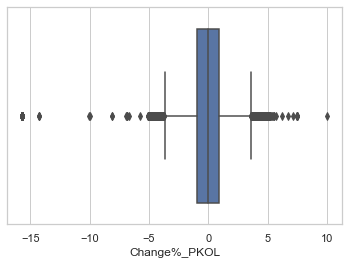

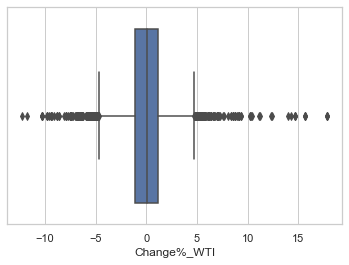

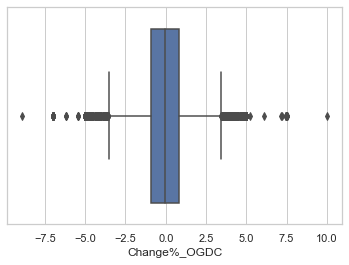

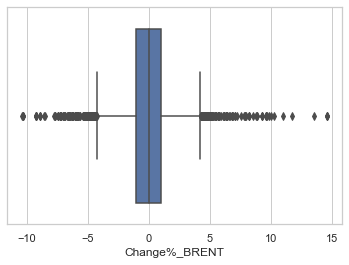

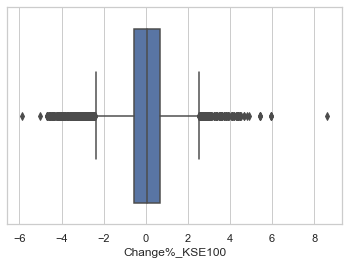

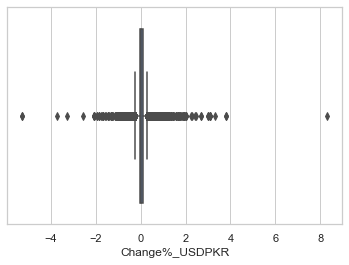

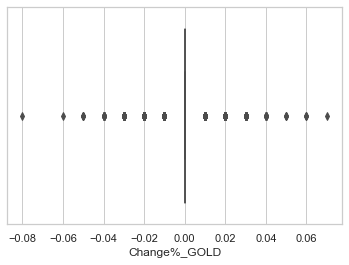

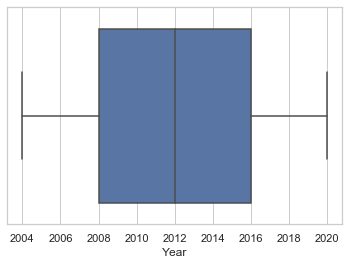

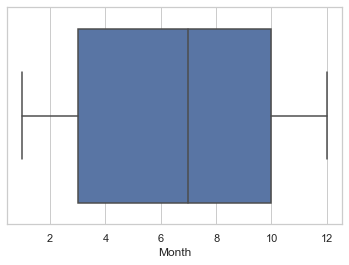

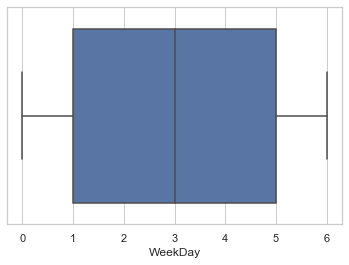

In [89]:
sns.set(style="whitegrid")
fig = plt.figure(figsize = (5,5))
for num in ds_merged:
    sns.boxplot(data = ds_merged, x = num)
    plt.show()

## Histograms

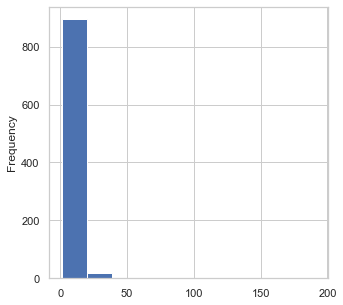

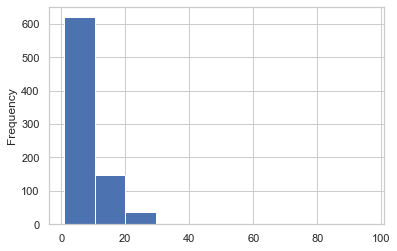

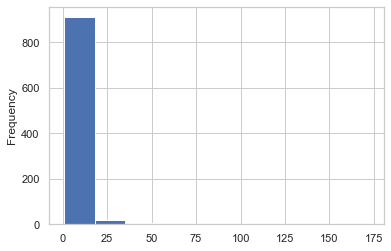

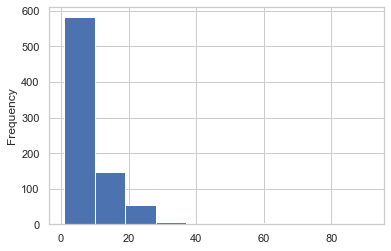

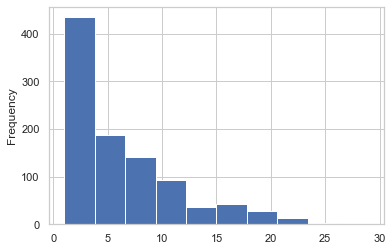

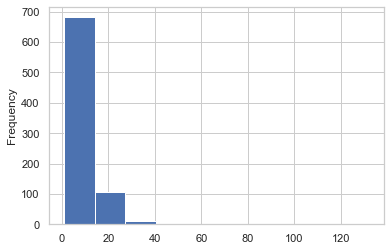

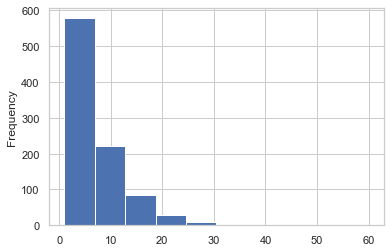

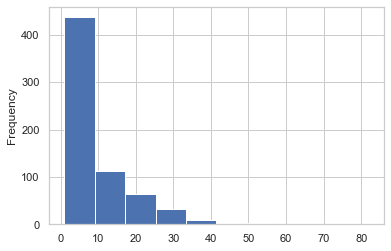

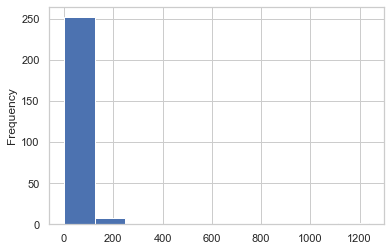

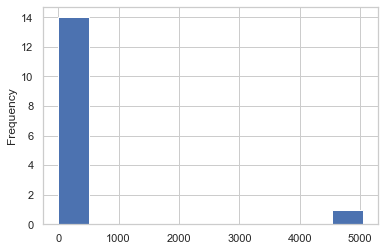

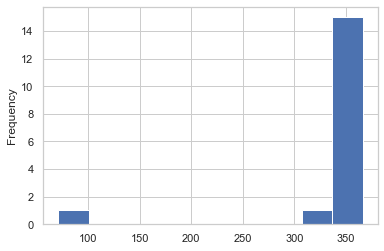

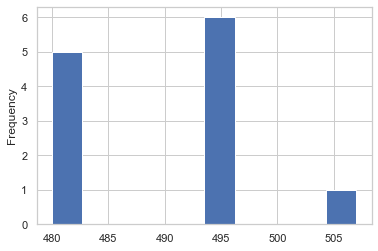

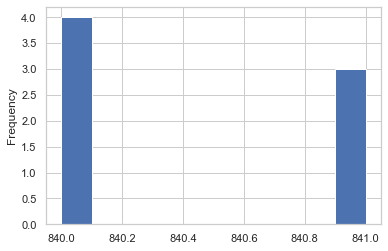

In [90]:
fig = plt.figure(figsize=(5,5))
for col in ds_merged:
    ds_merged[col].value_counts().sort_index().plot.hist()
    plt.show()
    print("\n")

## Checking Variations for outliers

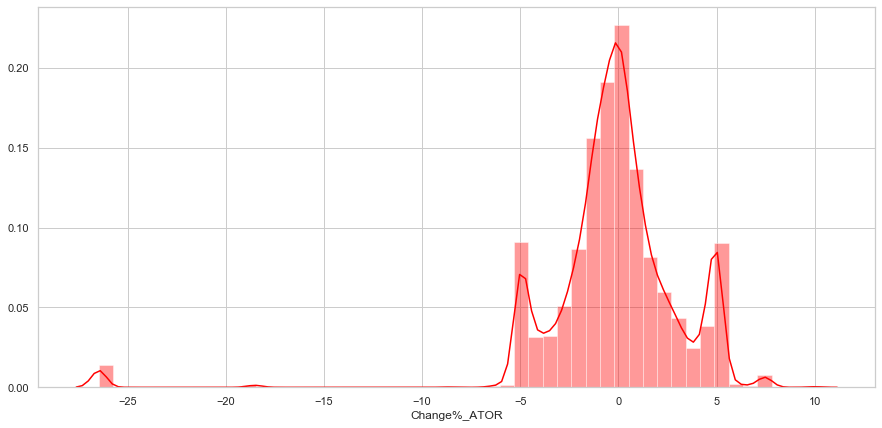

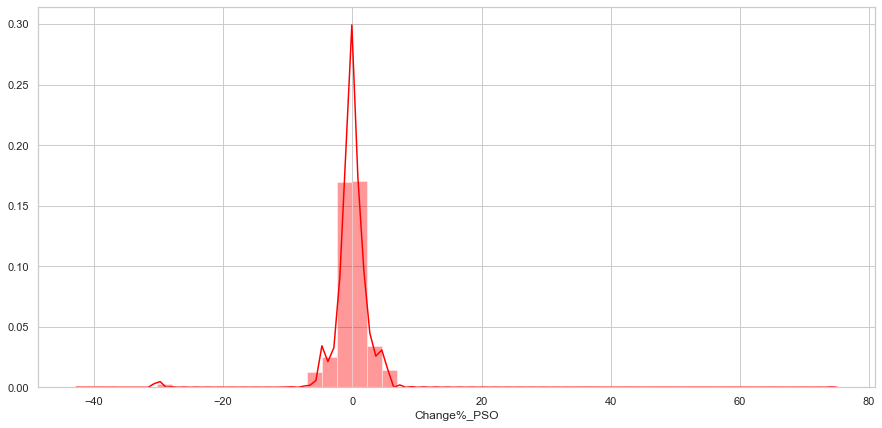

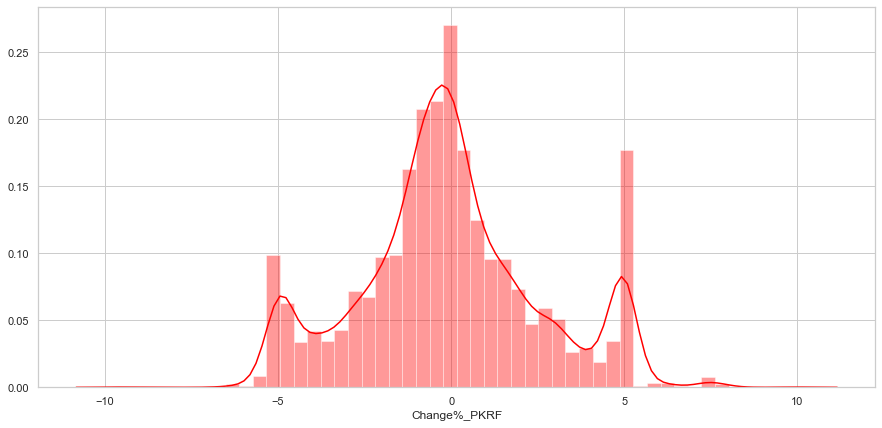

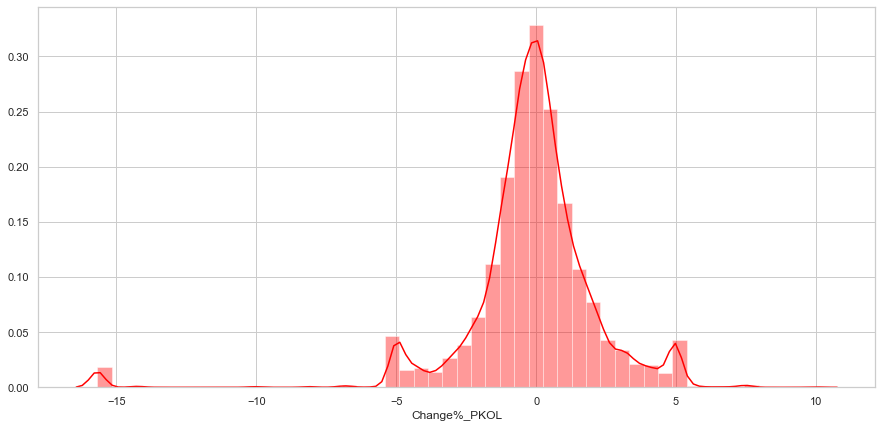

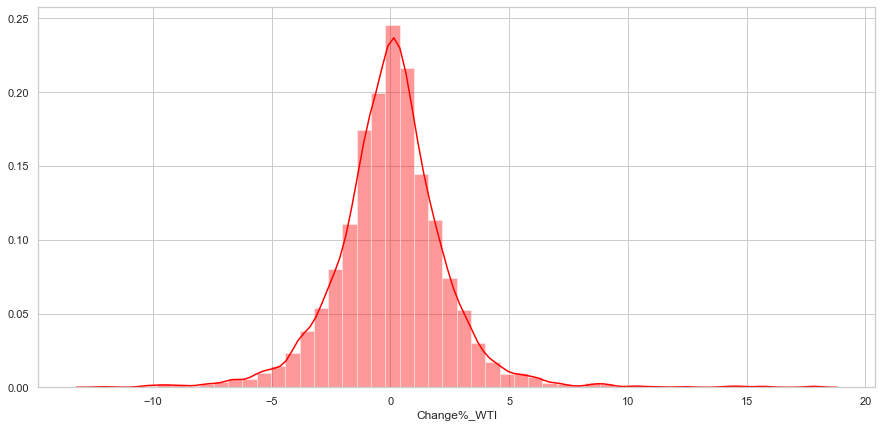

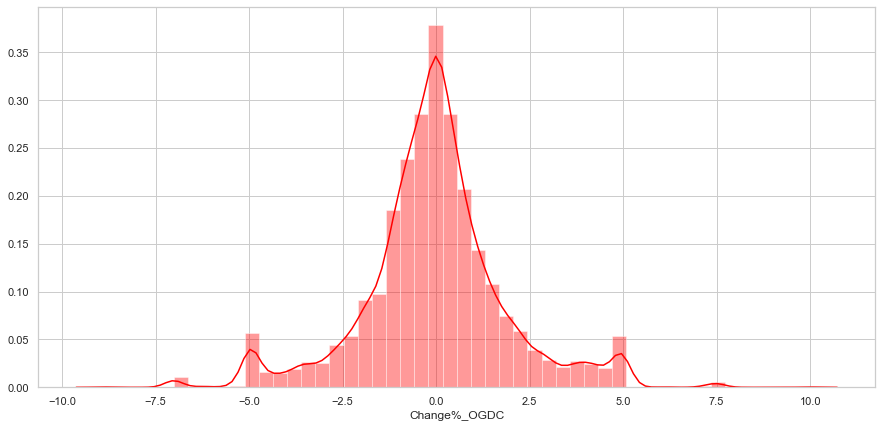

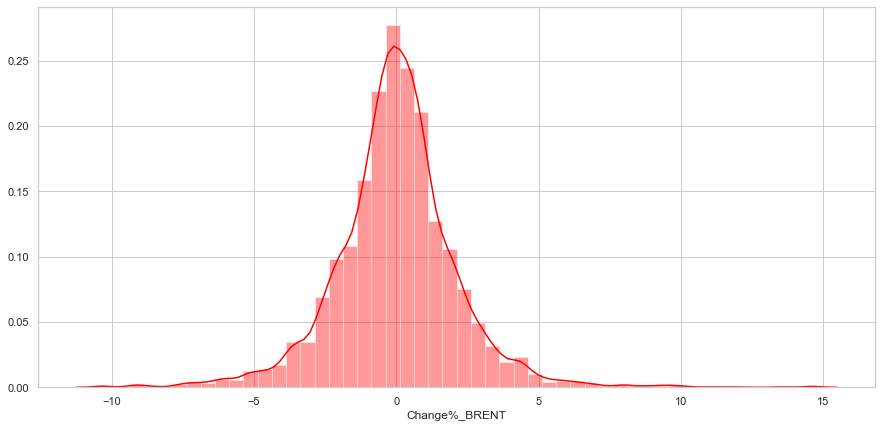

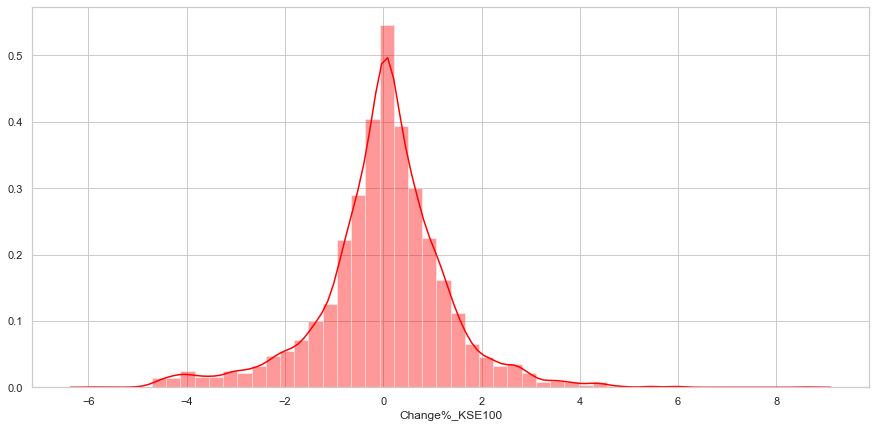

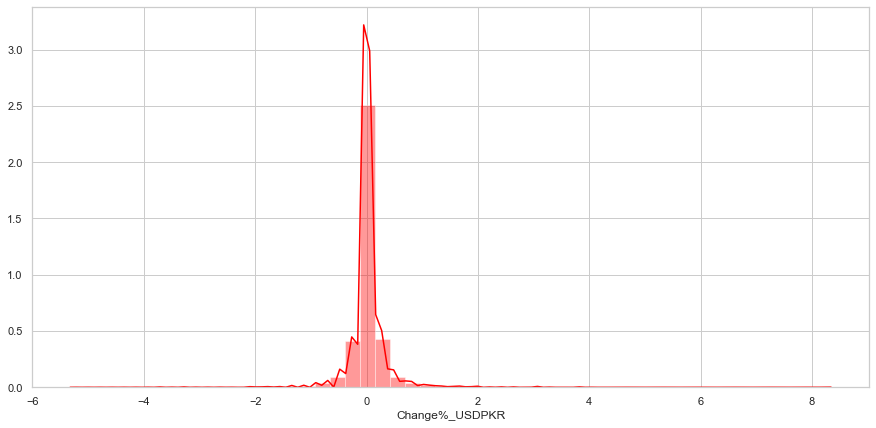

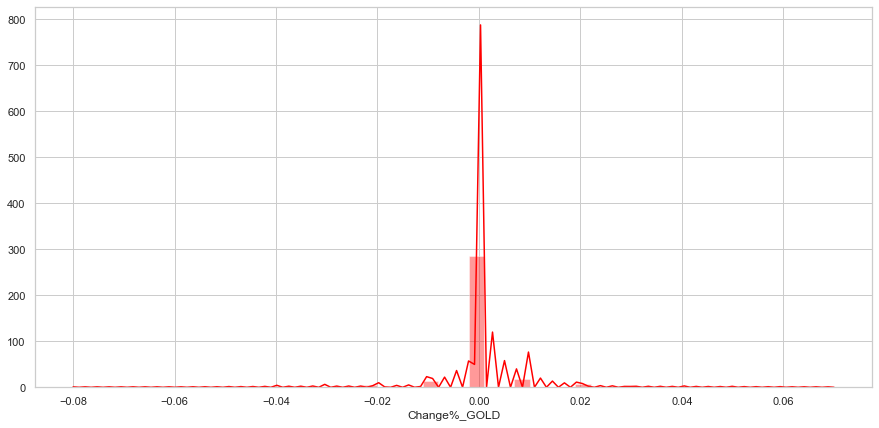

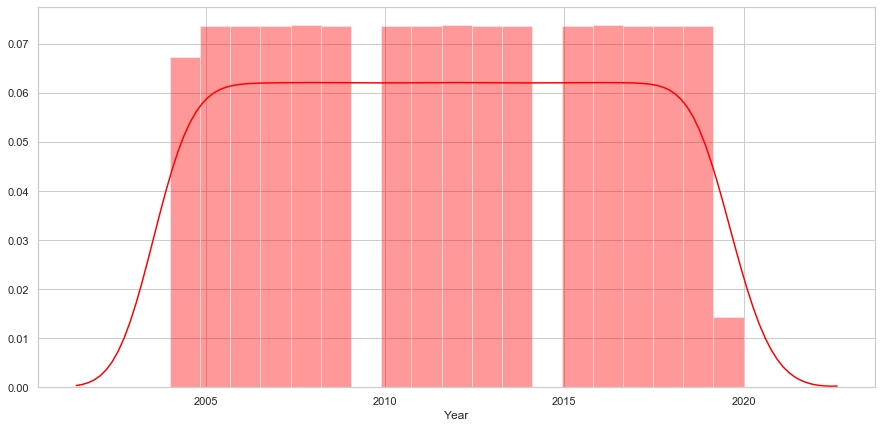

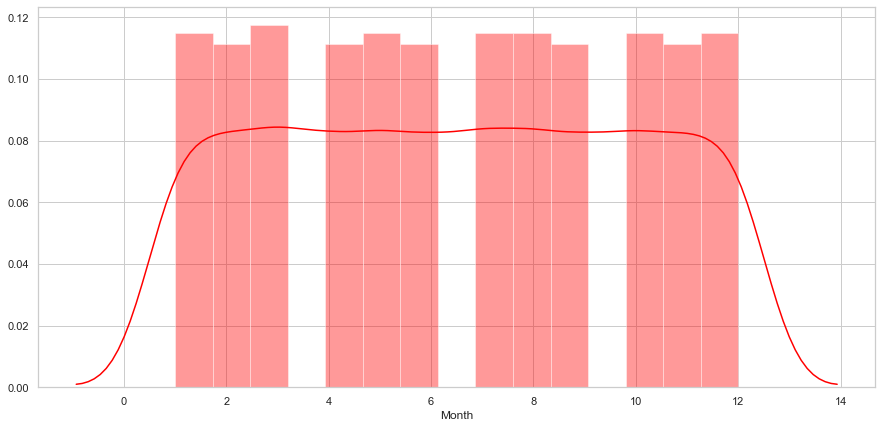

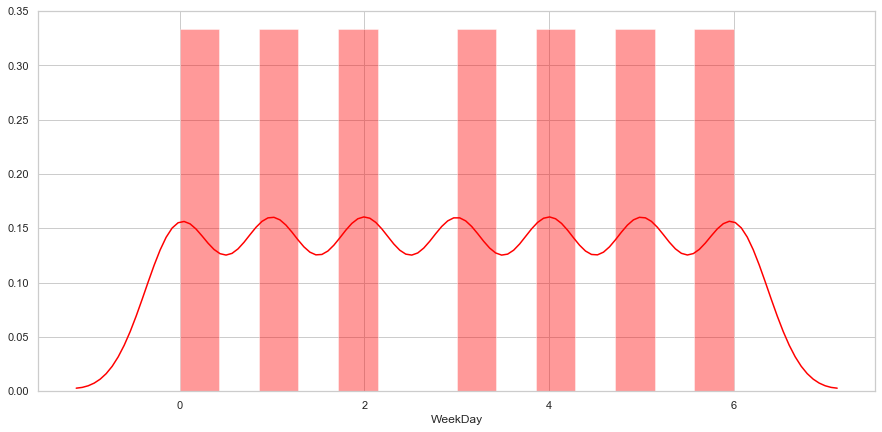

In [91]:
for col in ds_merged:
  plt.rcParams['figure.figsize'] = (15, 7)
  sns.distplot(ds_merged[col], color = 'red')
  plt.show()
  print('\n')

## Using Quartiles Technique to detect Outliers

In [92]:
Q1 = ds_merged.quantile(0.25)
Q3 = ds_merged.quantile(0.75)

In [93]:
IQR = Q3 - Q1
IQR

Change%_ATOR      2.76
Change%_PSO       2.02
Change%_PKRF      2.82
Change%_PKOL      1.82
Change%_WTI       2.36
Change%_OGDC      1.74
Change%_BRENT     2.12
Change%_KSE100    1.23
Change%_USDPKR    0.13
Change%_GOLD      0.00
Year              8.00
Month             7.00
WeekDay           4.00
dtype: float64

In [94]:
outliers = ds_merged[((ds_merged < (Q1 - 1.5 * IQR)) | (ds_merged > (Q3 + 1.5 * IQR)))]
outliers

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,0.01,NaN,NaN,NaN
2004-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-10,7.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN
2004-02-11,7.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01,NaN,NaN,NaN
2004-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN
2004-02-13,NaN,NaN,7.48,NaN,NaN,NaN,NaN,NaN,0.31,0.01,NaN,NaN,NaN
2004-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01,NaN,NaN,NaN


## Total number of Outliers

In [95]:
outliers.count().sum()

4791

## Replacing Outliers with Median

## Checking Variations after removing Outliers

## Checking BoxPlots after Removing Outliers

In [96]:
ds_merged.head()

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,1.41,-0.40,1.29,0.45,-1.81,0.19,-1.50,0.97,0.28,0.01,2004,2,0
2004-02-07,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,2
2004-02-08,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,3
2004-02-09,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,1
2004-02-10,7.50,1.45,0.58,0.20,3.17,1.32,3.19,1.23,-0.08,0.01,2004,2,5


In [97]:
def normalizing(ds_merged):
    ds_merged=(ds_merged-ds_merged.min())/(ds_merged.max()-ds_merged.min())
    return ds_merged

In [98]:
normalizing(ds_merged)

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,0.764464,0.357413,0.557536,0.628115,0.347074,0.480952,0.355084,0.472337,0.409292,0.600000,0.0,0.090909,0.000000
2004-02-07,0.595558,0.348889,0.365580,0.647196,0.443152,0.392063,0.453963,0.348548,0.396755,0.533333,0.0,0.090909,0.333333
2004-02-08,0.595558,0.348889,0.365580,0.647196,0.443152,0.392063,0.453963,0.348548,0.396755,0.533333,0.0,0.090909,0.500000
2004-02-09,0.595558,0.348889,0.365580,0.647196,0.443152,0.392063,0.453963,0.348548,0.396755,0.533333,0.0,0.090909,0.166667
2004-02-10,0.931451,0.373343,0.521385,0.618380,0.512633,0.540741,0.542834,0.490318,0.382743,0.600000,0.0,0.090909,0.833333
2004-02-11,0.932273,0.364302,0.628310,0.576713,0.419880,0.470899,0.392314,0.379668,0.401180,0.466667,0.0,0.090909,1.000000
2004-02-12,0.687963,0.351128,0.531059,0.520639,0.405253,0.293651,0.441954,0.284232,0.379056,0.600000,0.0,0.090909,0.666667
2004-02-13,0.778448,0.377475,0.872709,0.712227,0.464096,0.521693,0.481585,0.506916,0.411504,0.600000,0.0,0.090909,0.000000
2004-02-14,0.793803,0.350439,0.674134,0.596184,0.467753,0.435450,0.382306,0.403873,0.386431,0.466667,0.0,0.090909,0.333333


In [99]:
ds_merged.head()

,Change%_ATOR,Change%_PSO,Change%_PKRF,Change%_PKOL,Change%_WTI,Change%_OGDC,Change%_BRENT,Change%_KSE100,Change%_USDPKR,Change%_GOLD,Year,Month,WeekDay
Date,,,,,,,,,,,,,
2004-02-06,1.41,-0.40,1.29,0.45,-1.81,0.19,-1.50,0.97,0.28,0.01,2004,2,0
2004-02-07,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,2
2004-02-08,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,3
2004-02-09,-4.75,-1.39,-2.48,0.94,1.08,-1.49,0.97,-0.82,0.11,0.00,2004,2,1
2004-02-10,7.50,1.45,0.58,0.20,3.17,1.32,3.19,1.23,-0.08,0.01,2004,2,5


In [100]:
ds_merged=ds_merged.drop(['Change%_KSE100','Change%_ATOR','Change%_BRENT','Change%_PKOL'],axis=1)

## Feature Selection by Heatmap Coorelation

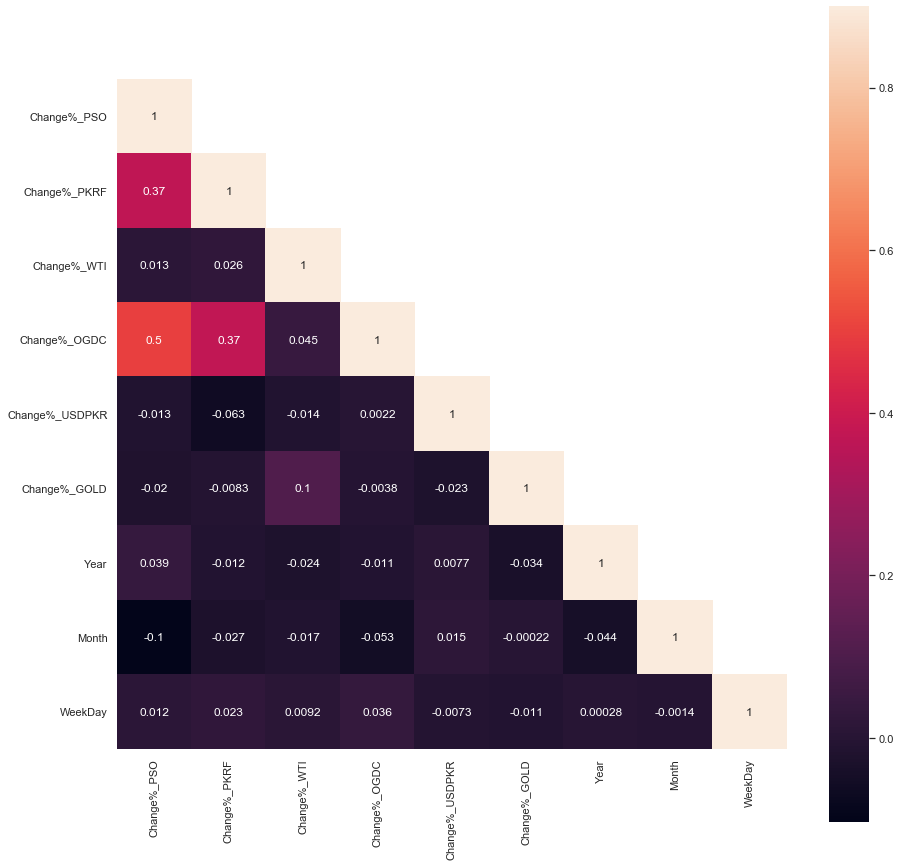

In [101]:
#create correlation
corr = ds_merged.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

## Seperating TARGET

In [102]:
target = ds_merged['Change%_WTI'].values
target

array([-1.81,  1.08,  1.08, ..., -2.52, -2.93, -0.06])

## Seperating FEATURES

In [103]:
features = (ds_merged.drop(['Change%_WTI','Change%_PSO','Year','Month','WeekDay'], axis=1)).values
features

array([[ 1.29,  0.19,  0.28,  0.01],
       [-2.48, -1.49,  0.11,  0.  ],
       [-2.48, -1.49,  0.11,  0.  ],
       ...,
       [-0.2 , -0.03,  0.12,  0.01],
       [-0.2 , -0.03, -0.11, -0.01],
       [-0.2 , -0.03, -0.51,  0.  ]])

## Spilitting Data Into 70:30

In [104]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=0)

## Verifying Assumption

### 1) Linear Relationship b/w all features and target

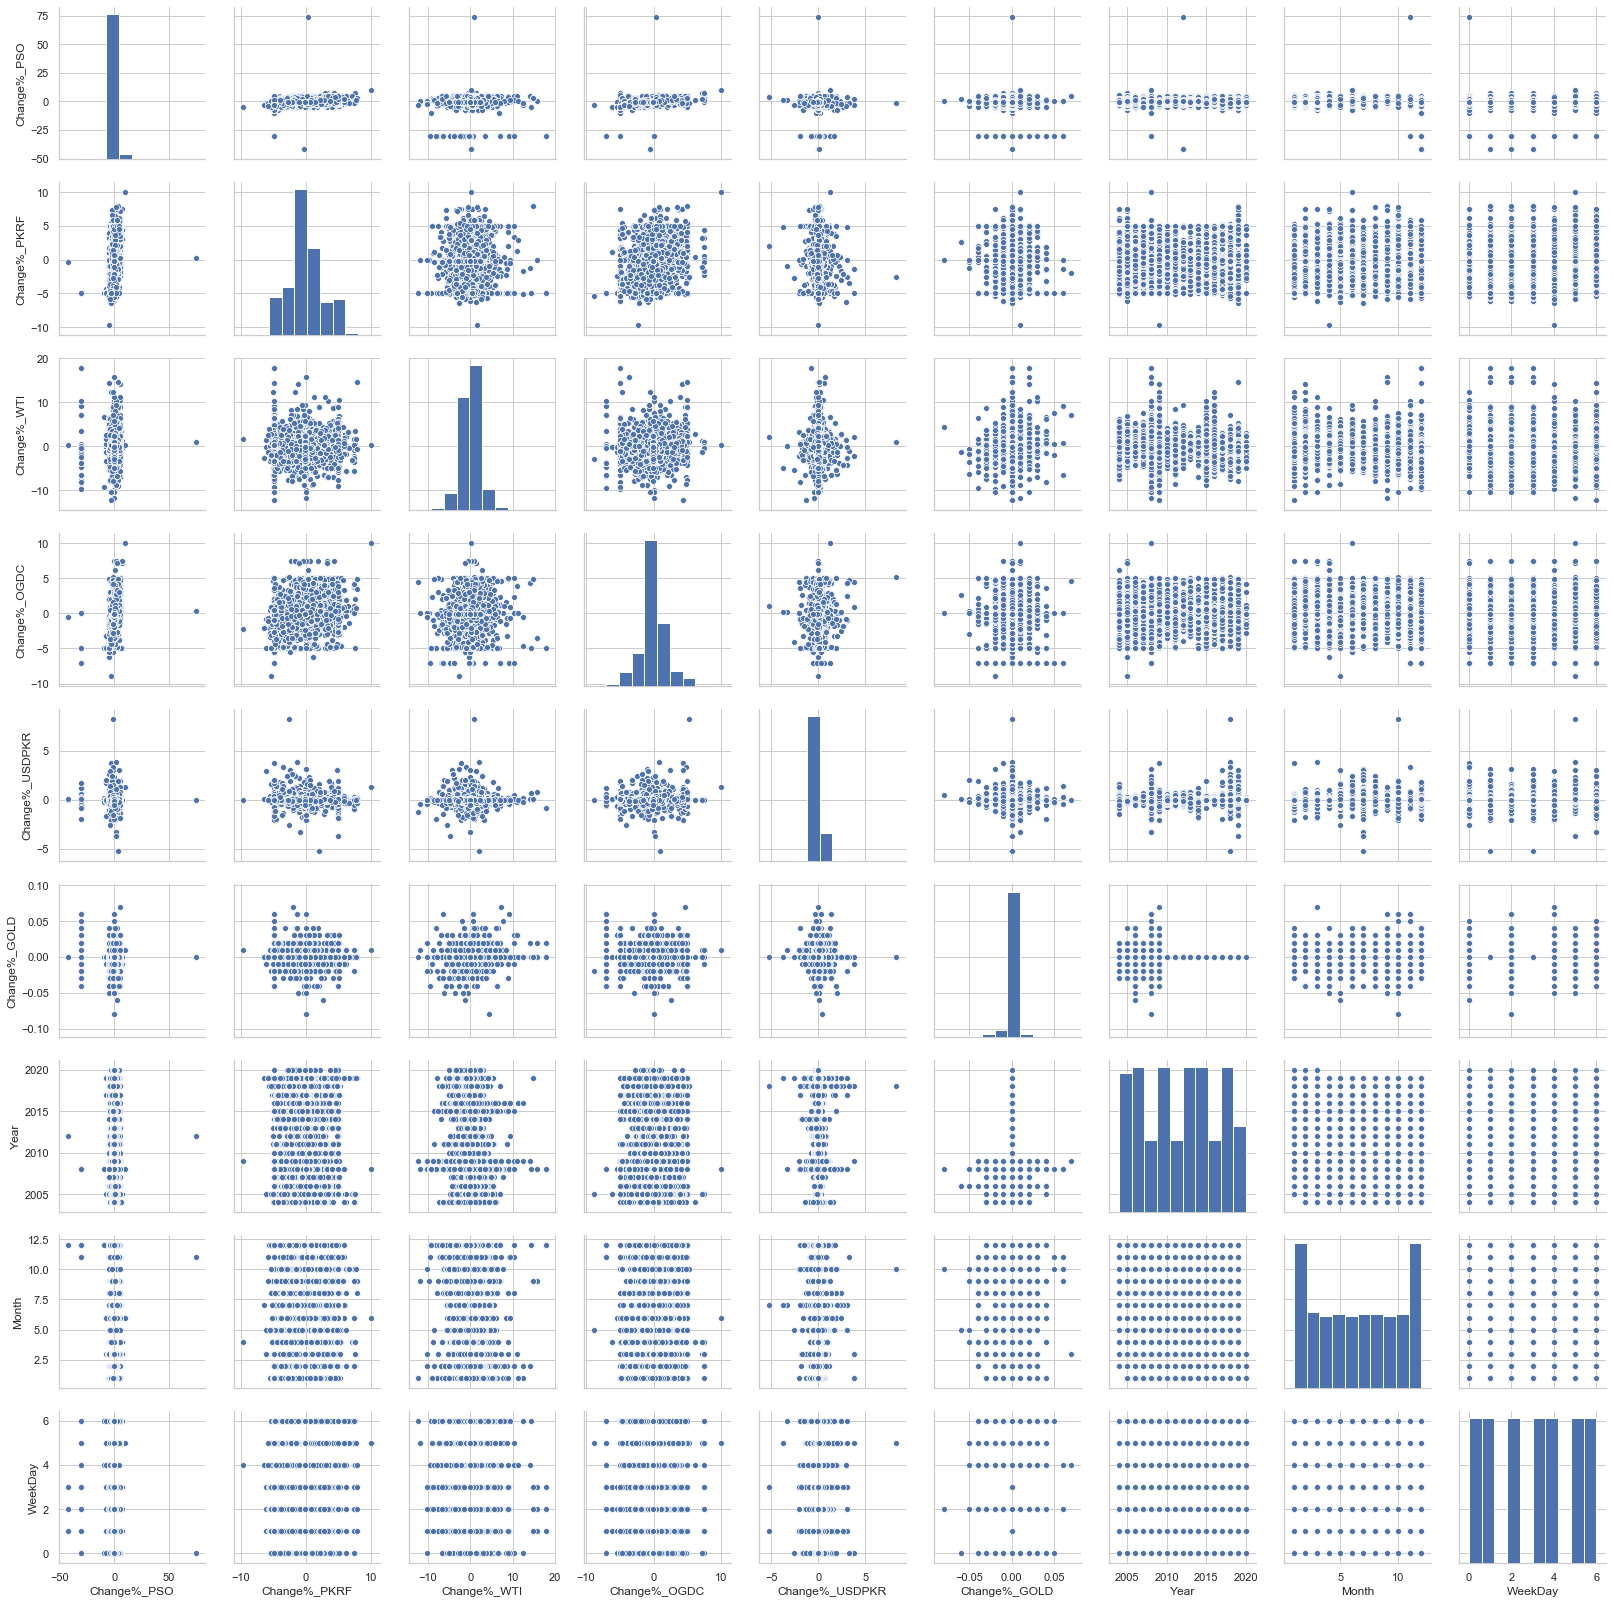

In [105]:
sns.pairplot(ds_merged)

### Little or no multicollinearity between the features

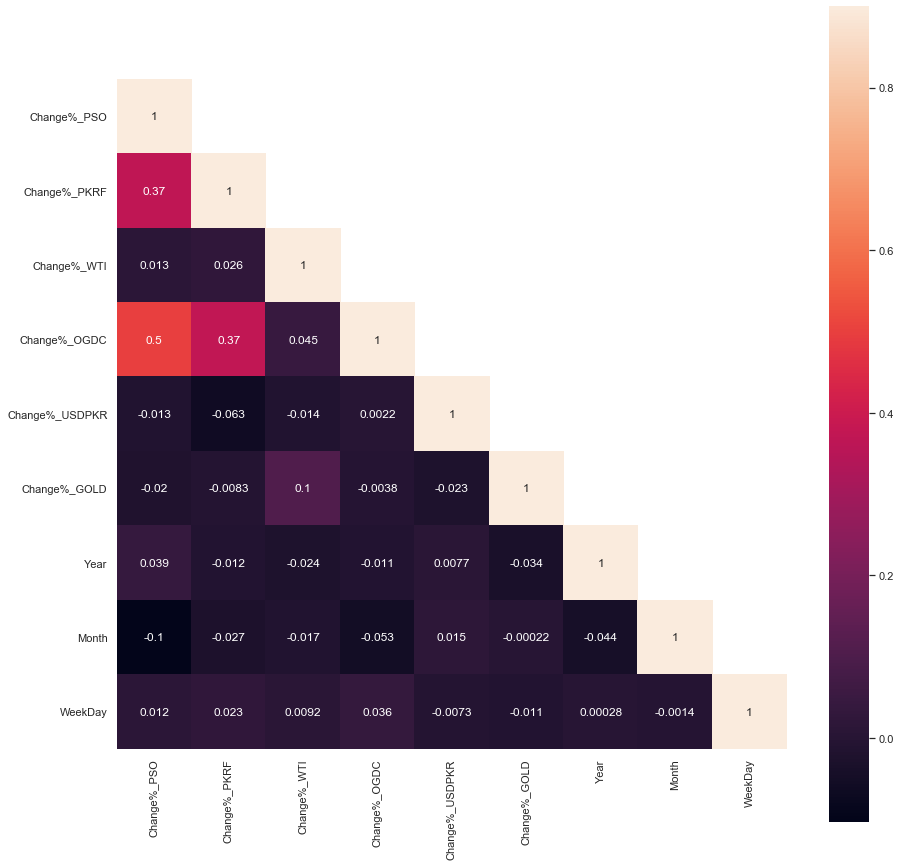

In [106]:
#create correlation
corr = ds_merged.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

### 3) Homoscedasticity Assumption 

### 4) Normal Distribution of error terms 

### 5) Little or No autocorrelation in the residuals

In [107]:
model=.OLS(y_train,X_train)
results=model.fit()
print(results.summary())

NameError: name 'sm' is not defined

## Linear Regression Model 

In [108]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
y_predLR = LR.predict(X_test)

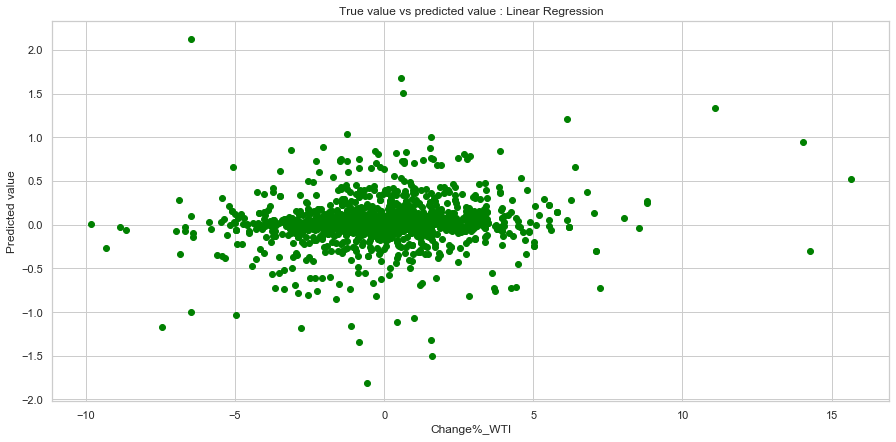

In [110]:
plt.scatter(y_test, y_predLR, c = 'green') 
plt.xlabel("Change%_WTI") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

## Accuracy of Linear Regression 

In [111]:
print('Accuracy on training data:', LR.score(X_train, y_train))
print('Accuracy on test data:', LR.score(X_test, y_test))

Accuracy on training data: 0.01340897938151031
Accuracy on test data: 0.01288300652778862


## Actual and Predicted value of Linear Regression

In [112]:
dsLR= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predLR.flatten()})

In [113]:
dsLR.head()

,Actual,Predicted
0,-0.24,0.191590
1,1.03,0.042168
2,-0.14,0.282238
3,-0.67,-0.030305
4,-2.89,-0.036776


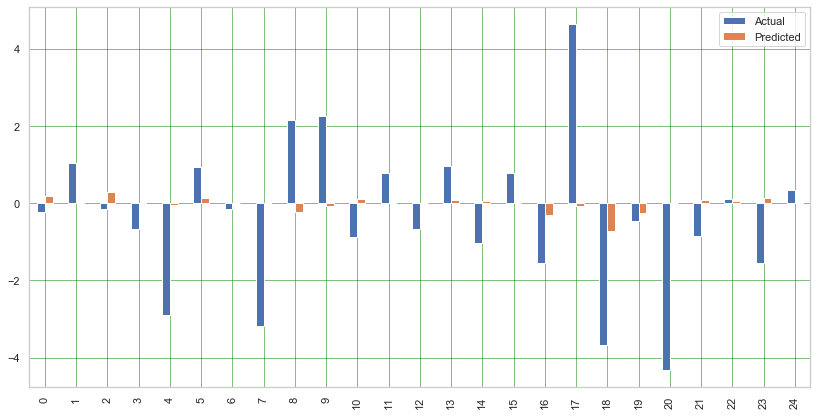

In [114]:
ds = dsLR.head(25)
ds.plot(kind='bar',figsize=(14,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Random Forest Model

In [115]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=1000, random_state=42)
RF.fit(X_train,y_train)

C:\Users\Moiz_Ali_Abedin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [116]:
y_predRF= RF.predict(X_test)

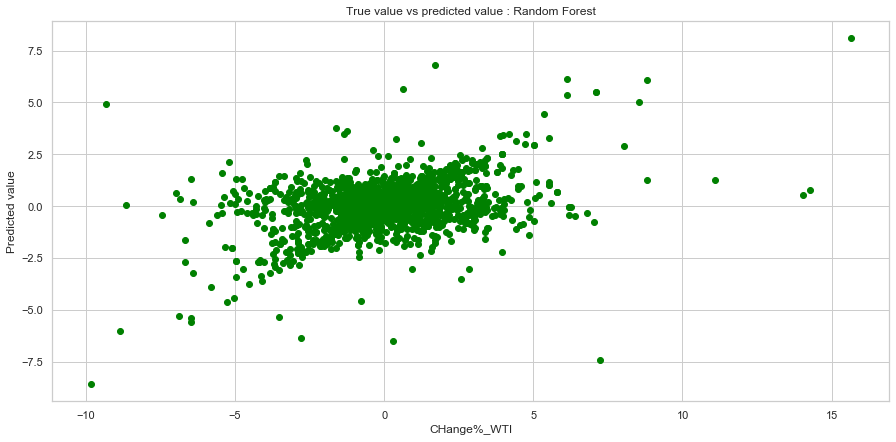

In [117]:
plt.scatter(y_test, y_predRF, c = 'green') 
plt.xlabel("CHange%_WTI") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Random Forest") 
plt.show() 

## Accuracy of Random Forest

In [118]:
print('Accuracy on training data:', RF.score(X_train, y_train))
print('Accuracy on test data:', RF.score(X_test, y_test))

Accuracy on training data: 0.8948680379196648
Accuracy on test data: 0.14890987244112153


In [119]:
RF.score(X_train,y_train)

0.8948680379196648

## Actual and Predicted Values of Random Forest

In [120]:
dsRF= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predRF.flatten()})

In [121]:
dsRF.head()

,Actual,Predicted
0,-0.24,0.664150
1,1.03,0.970260
2,-0.14,-0.012347
3,-0.67,-0.414900
4,-2.89,-0.223320


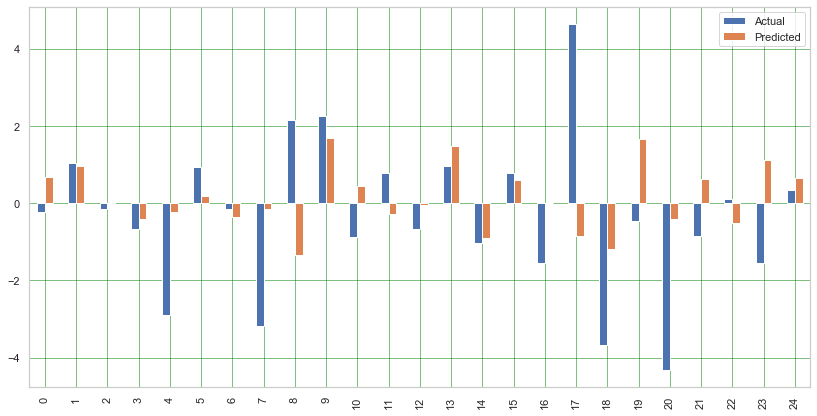

In [122]:
ds= dsRF.head(25)
ds.plot(kind='bar',figsize=(14,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Support Vector Machine Model

In [123]:
from sklearn.svm import SVR
SVM = SVR(kernel='linear')
SVM.fit(X_train,y_train)
y_predSVM = SVM.predict(X_test)

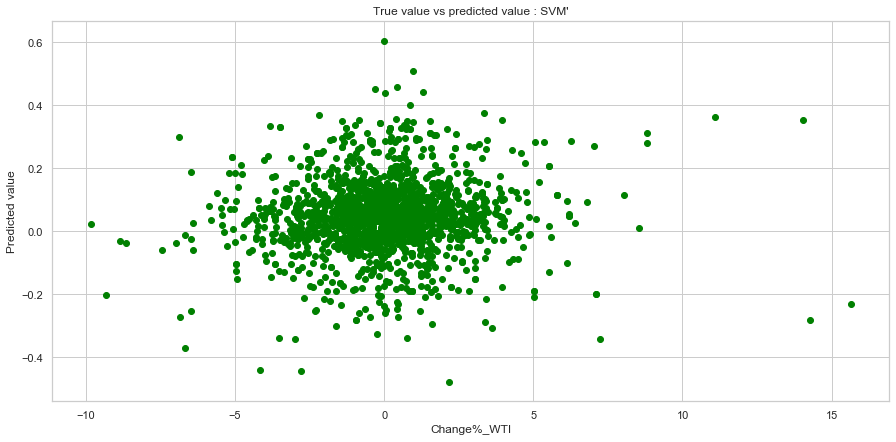

In [124]:
plt.scatter(y_test, y_predSVM, c = 'green') 
plt.xlabel("Change%_WTI") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : SVM'") 
plt.show() 

In [125]:
SVM.score(X_train,y_train)

0.0028695468344054347

## Accuracy of Support Vector Machine

In [126]:
print('Accuracy on training data:', SVM.score(X_train, y_train))
print('Accuracy on test data:', SVM.score(X_test, y_test))

Accuracy on training data: 0.0028695468344054347
Accuracy on test data: 0.0031897187630236523


## Actual and Predicted Value of Support Vector Machine 

In [127]:
dsSVM = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predSVM.flatten()})

In [128]:
dsSVM.head()

,Actual,Predicted
0,-0.24,0.154106
1,1.03,0.068105
2,-0.14,0.342722
3,-0.67,0.022069
4,-2.89,-0.015192


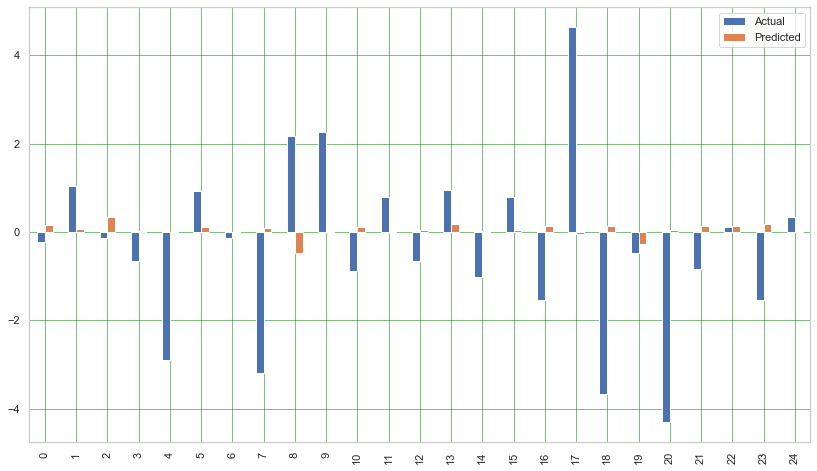

In [129]:
ds = dsSVM.head(25)
ds.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## MAE and MSE of All Models

In [130]:
print('Multiple Linear Regression:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predLR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predLR))

print('\nRandom Forest Regression:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRF))

print('\nSVM Regression:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predSVM))

Multiple Linear Regression:

Mean Absolute Error: 1.6026737321195557
Mean Squared Error: 4.967624670663412

Random Forest Regression:

Mean Absolute Error: 1.4036503982420976
Mean Squared Error: 4.283075200385126

SVM Regression:

Mean Absolute Error: 1.608408422764682
Mean Squared Error: 5.016405732846029
